In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

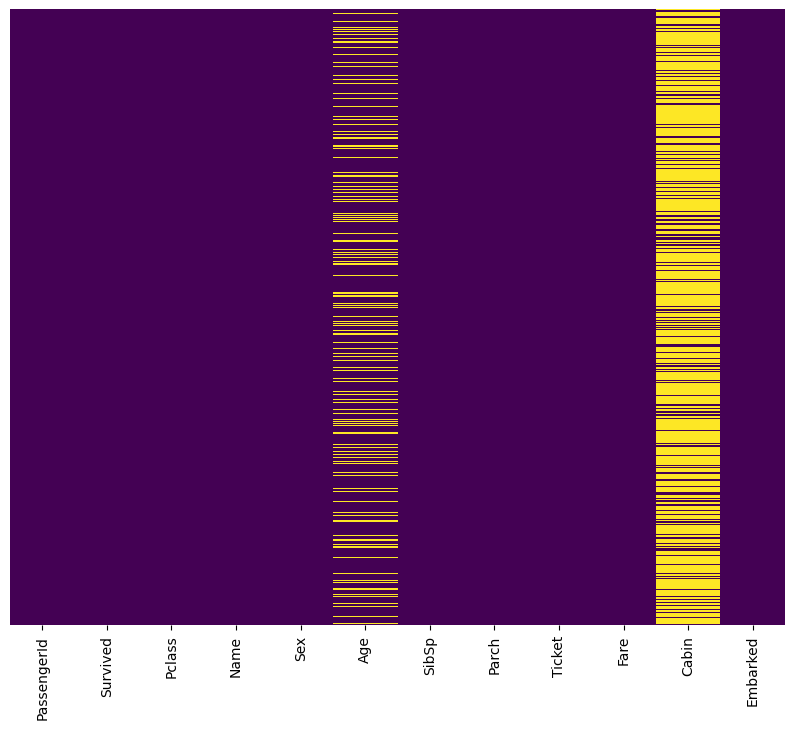

In [6]:
#Análisis de valores faltantes
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Datos faltantes en cabina y en la edad de los pasajeros

C:\Users\alejo\AppData\Local\Temp\ipykernel_23400\688297217.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

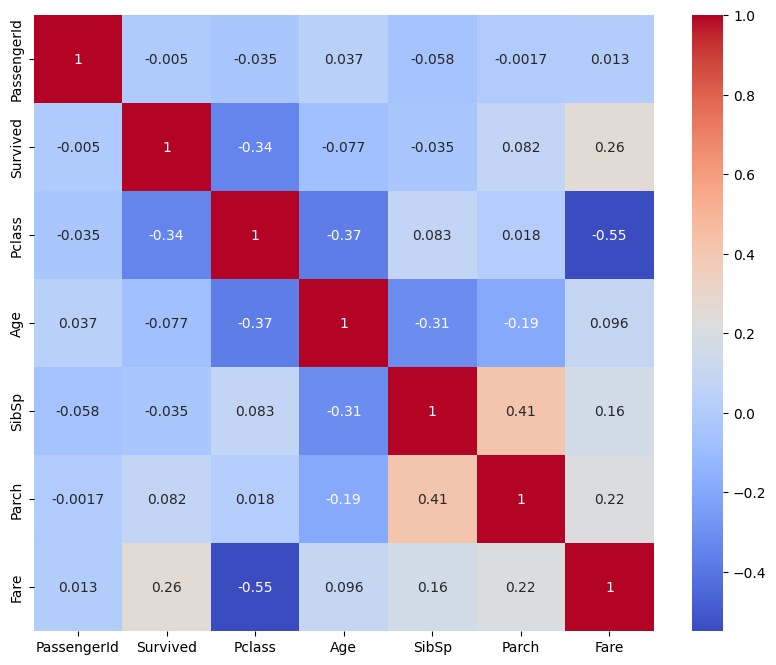

In [7]:
#Visualización de datos
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

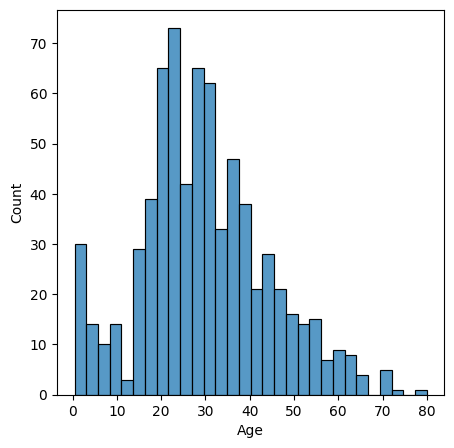

In [18]:
plt.figure(figsize=(5,5))
sns.histplot(df['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='Survived', ylabel='count'>

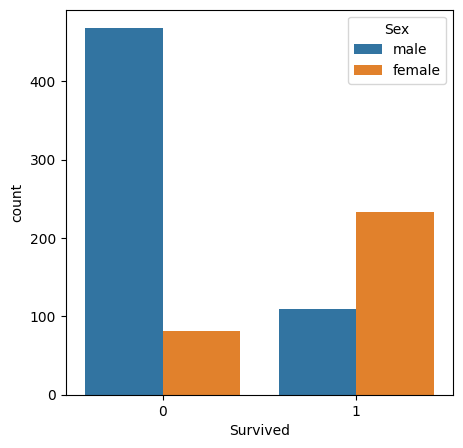

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

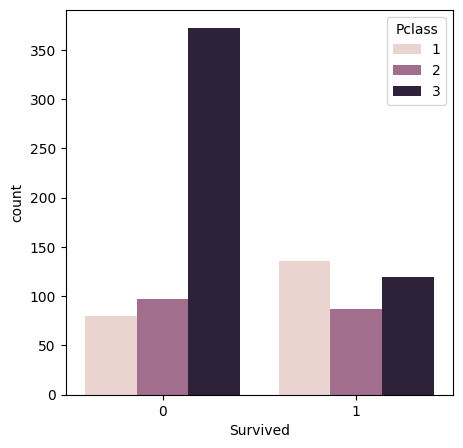

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Survived',hue='Pclass')

<Axes: xlabel='Fare', ylabel='Count'>

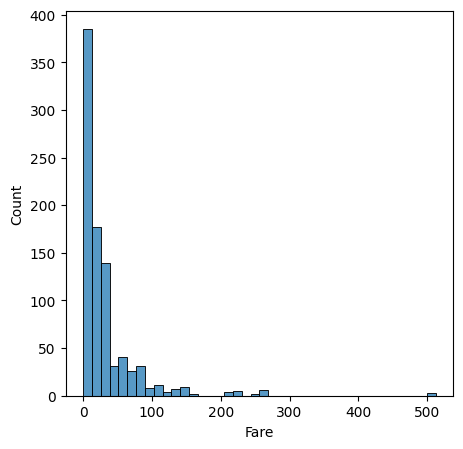

In [20]:
plt.figure(figsize=(5,5))
sns.histplot(df['Fare'],kde=False,bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

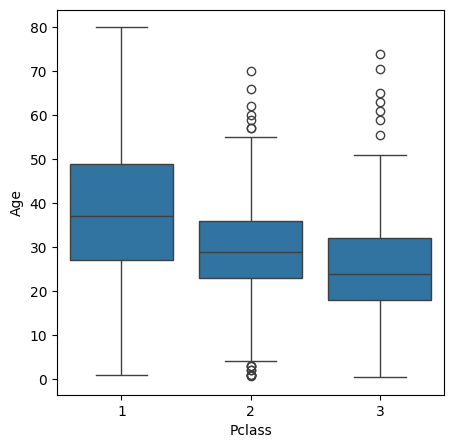

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Pclass', y='Age')

<Axes: xlabel='Sex', ylabel='Age'>

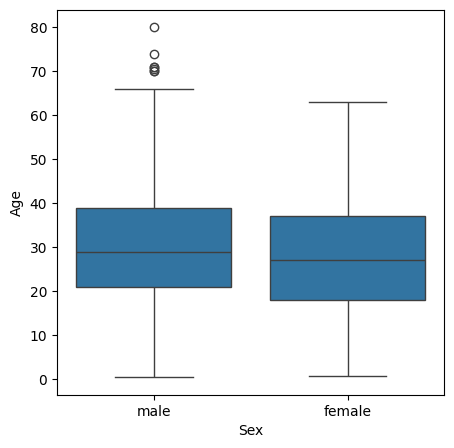

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Sex', y='Age')

<Axes: xlabel='Pclass', ylabel='Fare'>

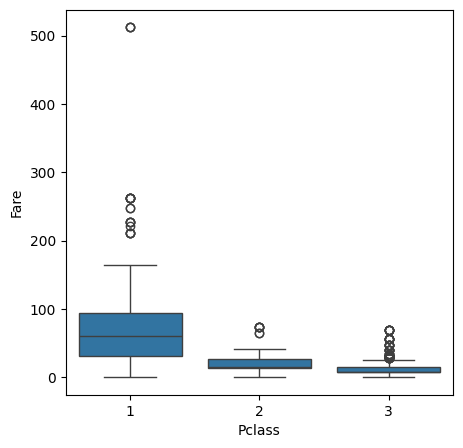

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Pclass', y='Fare')

In [24]:
#Creando una nueva caraceterística 'FamilySize' que combina 'SibSp' y 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [25]:
#Creando una nueva caracterítica 'IsAlone' que indica si el pasajero está solo
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [34]:
#Creando una nueva caracterítica 'AgeClass' que combina 'Age' y 'Pclass'
df['AgeClass'] = df['Age'] * df['Pclass']

In [40]:
#Creando una nueva caracterítica 'FarePerPerson' que divide 'Fare' por 'FamilySize'
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

C:\Users\alejo\AppData\Local\Temp\ipykernel_23400\3340419525.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

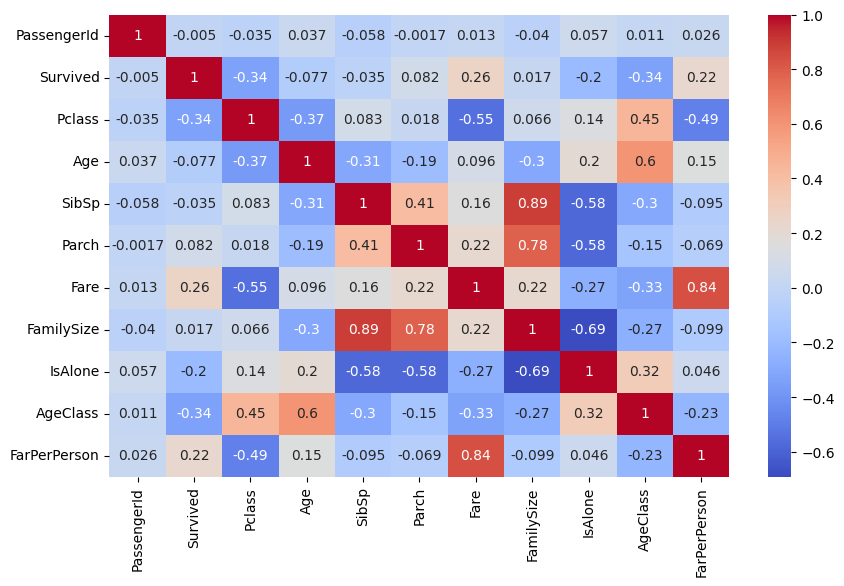

In [35]:
#Visualización de las nuevas características
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='IsAlone', ylabel='count'>

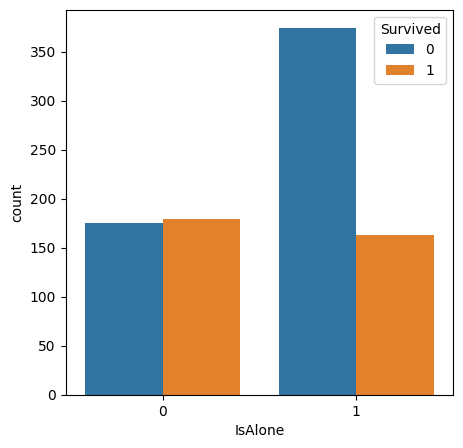

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='IsAlone',hue='Survived')

<Axes: xlabel='FamilySize', ylabel='Count'>

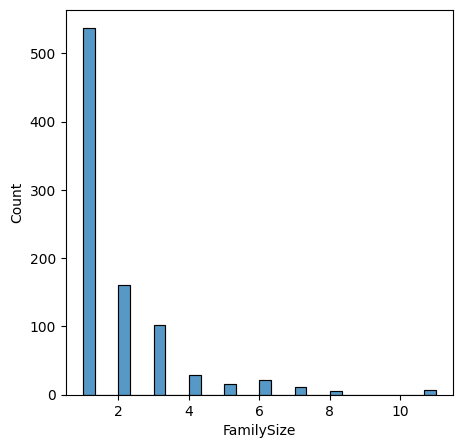

In [37]:
plt.figure(figsize=(5,5))
sns.histplot(df['FamilySize'],kde=False,bins=30)

<Axes: xlabel='AgeClass', ylabel='Count'>

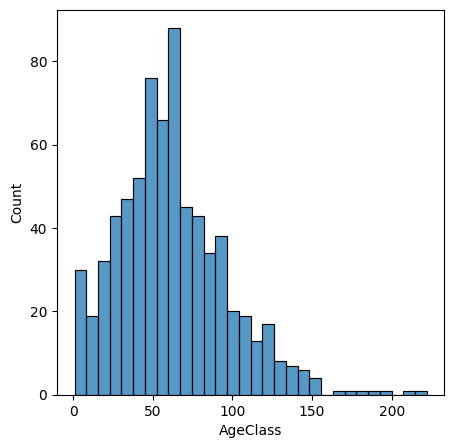

In [38]:
plt.figure(figsize=(5,5))
sns.histplot(df['AgeClass'].dropna(),kde=False,bins=30)

<Axes: xlabel='FarePerPerson', ylabel='Count'>

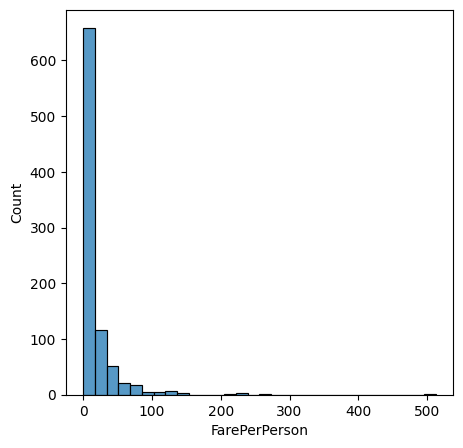

In [41]:
plt.figure(figsize=(5,5))
sns.histplot(df['FarePerPerson'],kde=False,bins=30)